<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Hppymonk.AI/blob/main/Happymonk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [5]:
#loading data from keras 
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
#First image of our data set in pixels
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
#shape of first image
X_train[0].shape

(28, 28)

Pixel value of firt image

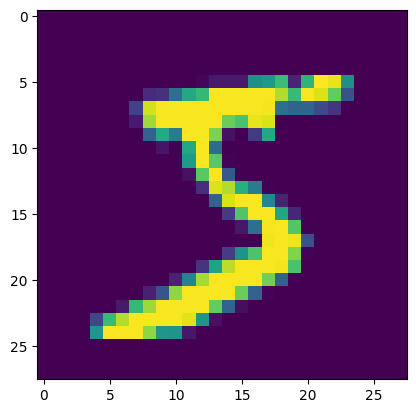

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

With the help of matplot lib I have ploted the first image of our training data set.

In [12]:
#shape of our dataset
X_train.shape

(60000, 28, 28)

In training data set we have 60k image of numbers with pixels of 28*28

In [13]:
X_test.shape

(10000, 28, 28)

In test data set we have 10k image with pixles of 28*28

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

y_train is our labels input 

**So in our MNIST data set we have total 70K image 60K for training and 10k for test**

## Data Normalization

In [18]:
# We have maximum pixel value is 255 so if we divide every image pixel with 255 so the maximum value 
#become one 
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [21]:
from keras.api._v2.keras import activations
#Creating a model
model = Sequential()

#Flatten convert your imput data in on dimension
model.add(Flatten(input_shape=(28,28)))

#adding our first input layer
model.add(Dense(128,activation='relu'))

#adding outpult layer
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In First dence layer we have 784 input 128 nodes so 784*128 = 100352(weights) + 128 (bias) there for total 100480 trainable parameters.

In between hidden layer and output layer there are 128 input and 10 node so 128*10 = 1280 (weights) + 10 (bias) there for total 1290 trainable parameters.

In [38]:
#Compile our model
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

In [39]:
#train our model
history = model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1983 - accuracy: 0.9435 - val_loss: 0.1960 - val_accuracy: 0.9473
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1926 - accuracy: 0.9451 - val_loss: 0.1943 - val_accuracy: 0.9462
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1868 - accuracy: 0.9469 - val_loss: 0.1891 - val_accuracy: 0.9463
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1810 - accuracy: 0.9493 - val_loss: 0.1826 - val_accuracy: 0.9497
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1758 - accuracy: 0.9501 - val_loss: 0.1798 - val_accuracy: 0.9502
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1707 - accuracy: 0.9520 - val_loss: 0.1760 - val_accuracy: 0.9511
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1659 - accuracy: 0.9531 - val_loss: 0.1739 - val_accuracy:

In [40]:
# prediction of our model
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [41]:
y_pred = y_prob.argmax(axis=1)

In [42]:
# test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9534

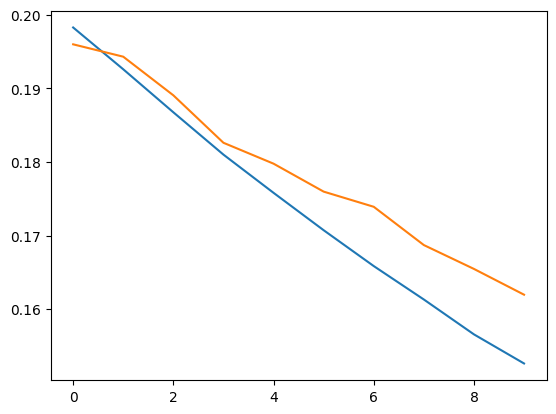

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

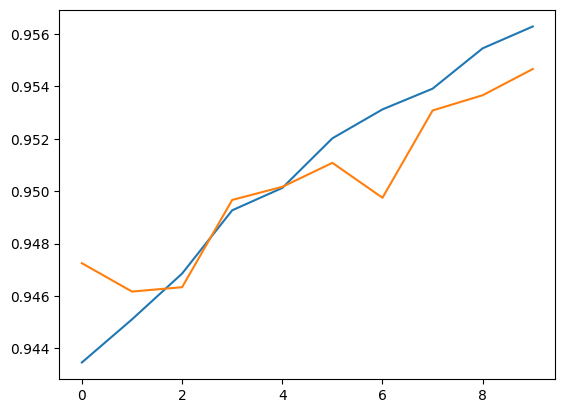

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Experiment 
## Which activation function should we use for this data
## How many hidden layers we can take for best result
## What is the batch size
## which optimizer we should use